# Woessmann - The Importance of School System

This notebook replicates results from

L. Woessmann (2016), The Importance of School Systems: Evidence from International Differences in Student Achievement.
Journal of Economic Perspectives—Volume 30, Number 3, Pages 3–32

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

## Introduction

Woessmann shows in his paper that differences in student achievement across countries are systematically related to differences in organisation and governance of school systems, such as external exit exams, autonomy of course and teacher choice. In other words, the way the school system is set up matters for student performance.


**Agenda of the paper:** 

* Woessmann first describes the size and cross-test consistency of international differences in student achievement,
* then uses an education production function to describe the relation of factors of (and beyond the) respective school system to achievement differences,
* and adds a discussion and conclusion.

The education production function used by the author is given by:

$achievement_s = \alpha family + \beta resources + \gamma institutional$
    
where achievement is the student achievement by country, which is regressed on three collapsed aggregate country level variables: family background, school resources and institutional structures of the school system

## Visualization of the Identification Strategy & Issues

As outlined before, Woessmann tries to explain the variation of student test achievement with three factors: family, resources, and institutional structures.
![title](DAG_identification.png)

Each input factor, by itself, somehow influences student achievement: within school resources, there is the amount of money allocated to the respective schools, family background is fleshed out by a student family's immigration status or their neighbourhood. Institutional structures is determined by whether students face external exit exams, whether schools may hire autonomously and may choose their teachers' salary.

However, the picture is not as simple as shown above.
![title](DAG_discussion.png)


The author concesses, that inputs are not exogenous to the educational process. For example, there would be a reverse causation, if governments assigned additional resources to low-achieving schools, i.e. schools with many low-achieving students in the PISA tests.
**Need to add additional/different arrows**
There could also be a selection bias, if parents select schools based on what schools offer: thus, parents with high-achieving children might select different schools with specific resources than parents with low-achieving children. This bias would also be present if high-achieving schools were able to select their preferred (probably high-achieving) students.

Endogeneity through omitted variable bias could be present through country-level factors such as culture (thus valuation of achievement/education) that drives inputs, parents' preferences, and student effort.

To exclude any bias to do with expenditure per student and cultural preferences with regard to education, the author proposes to use changes in average country expenditure over time, as was done in a different paper (Gundlach, Woessmann, and Gmelin (2001)[**FOOTNOTE**]

![title](DAG_discussion2.png)
This is what I think should be added as well: dependency between school system and school resources and what I call test taking: students may differ in their maturity (e.g. take this test actually seriously and not just write anything) and also might differ in their test taking ability - and if that is low, they might choose not to take it even when selected to do so and rather e.g. play ill.

## Data Analysis

After a discussion of various international tests, they select the OECD PISA test with data from 2003. PISA assesses "knowledge and skills essential for full participation in our modern society" (footnote) and draws a random sample of 15year-olds in a two-stage sampling. The dataset they work with relates school system to student achievement in 29 OECD countries.

In [54]:
# Read in the data and convert .dta file to .csv
data = pd.io.stata.read_stata('data/pisa2003_oecd_jep.dta')
data.to_csv('data/pisa2003_oecd_jep.csv')

# Create pandas Dataframe
df = pd.DataFrame(data=data)

As the author focuses on three groups of input factors: family background factors, institutional factors, and school resources, the next table is created to get a nice first look at the data.

In [55]:
# create new dataset with all the variables sorted into the higher order input factors
c_res = df[['expps', 'davailinstmat4', 'davailinstmat1', 'insttimemath', 'propcert', 'propqped']]
c_fam = df[['escs', 'age', 'female', 'dstupreprim2', 'ageprim', 'repisced1', 'repisced2', 'dgrade7', 'dgrade8', 'dgrade9', 'dgrade11', 'dgrade12', 'dliveone', 'dlivepatch', 'dliveboth', 'dworkstat4', 'dworkstat3', 'dworkstat2', 'dworkstat1', 'dhsecateg3', 'dhsecateg2', 'dhsecateg1', 'dbook2', 'dbook3', 'dbook4', 'dbook5', 'dbook6', 'dimmig2', 'dimmig3', 'dstulanguage3', 'dstulanguage4', 'dschoolloc23', 'dschoolloc4', 'dschoolloc5']]
c_ins = df[['cprivate', 'cschoolbudgetgov', 'mcentexa', 'purstudret', 'teacassprin', 'teacassextinsp', 'purcompave', 'purstudgrp', 'autstartsal', 'icautstartsal', 'autformbudget', 'icautformbudget', 'autcontent', 'icautcontent', 'authire', 'icauthire']]

df_overview = pd.concat([df['cnt'], df['pv1math'], c_res, c_fam, c_ins], axis =1, keys=['Country', 'test_score', 'School resources', 'Family Background', 'Institution'])
df_overview.head()

Country  test_score School resources                                \
      cnt     pv1math            expps davailinstmat4 davailinstmat1   
0     AUS  418.086914        59.264999            0.0            0.0   
1     AUS  446.985504        59.264999            0.0            0.0   
2     AUS  501.822693        59.264999            0.0            0.0   
3     AUS  506.807892        59.264999            0.0            0.0   
4     AUS  341.828888        59.264999            0.0            0.0   

                                 Family Background         ... Institution  \
  insttimemath propcert propqped              escs    age  ...  purcompave   
0          0.0      1.0     0.62         -0.758119  16.25  ...         0.0   
1        300.0      1.0     0.63          0.706989  15.92  ...         0.0   
2        250.0      1.0     0.90         -0.542674  16.00  ...         0.0   
3        500.0      1.0     0.68         -0.267831  15.33  ...         0.0   
4        200.0      1.0     0.62          0.021161  15.92  ...         0.0   

                                                                      \
  purstudgrp autstartsal icautstartsal autformbudget icautformbudget   
0        1.0         0.0           0.0           1.0           0.814   
1        1.0         0.0           0.0           1.0           0.814   
2        1.0         0.0           0.0           1.0           0.814   
3        1.0         0.0           0.0           1.0           0.814   
4        1.0         0.0           0.0           1.0           0.814   

                                             
  autcontent icautcontent authire icauthire  
0        1.0        0.814     0.0       0.0  
1        1.0        0.814     0.0       0.0  
2        1.0        0.814     0.0       0.0  
3        1.0        0.814     0.0       0.0  
4        1.0        0.814     0.0       0.0  

[5 rows x 58 columns]

Following the author, the table below shows the mean test scores per country, sorted from highest (Netherlands, with 542 points) to the lowest (Mexico, with 405 points). Germany is ranked 15th, just below Austria; USA is placed at rank 25. 

In [56]:
# Compute mean scores by country
df['pv1math'] = df['pv1math'].astype(float)
df_for_mean_scores_by_country = df[['cnt', 'pv1math']]
df_for_mean_scores_by_country.groupby('cnt').mean().sort_values('pv1math', ascending=False)

,pv1math
cnt,
NLD,542.526922
FIN,542.508653
KOR,540.065957
CZE,534.831189
JPN,532.981523
BEL,532.974255
NZL,526.127360
AUS,522.398177
CAN,521.631896


Since averages convey limited information, the following plot shows test score distributions: of Japan, USA and, for reference, the distribution of all countries in the dataset together.

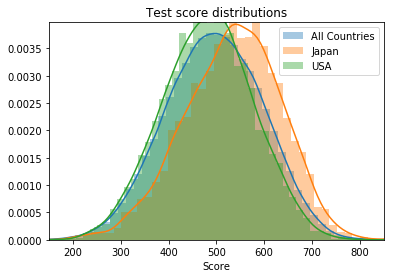

In [57]:
# plot individual country vs. the rest
df_for_mean_scores_by_country.set_index("cnt", inplace=True)
df_for_mean_scores_by_country.loc['DEU']

# create plot of test scores with Germany, USA, and all countries to compare the distributions
ax = sns.distplot(df['pv1math'], label='All Countries')
ax = sns.distplot(df_for_mean_scores_by_country.loc['JPN'], label='Japan')
ax = sns.distplot(df_for_mean_scores_by_country.loc['USA'], label='USA')
ax.set_xlim(150, 850)
ax.set_title('Test score distributions')
ax.set_xlabel('Score')
ax.legend();


The distribution of math test scores for all countries looks pretty normally distributed. 
Japan's distribution is, compared to the one for all countries, skewed to the right (with higher scores), while U.S. students' performance distribution is slightly skewed to the left - as the selected countries are number five from above and below, this nicely shows that neither country's mean score is due to drastic outliers to either side. Thus, differences in average test scores should be due not to e.g. a larger share of drastically low (high) performing students, but rather to differences in the setup of the educational system.

As this paper is titled "The Importance of School Systems", I want to do a rough comparison between institutional factors and test scores next.

,count,mean,std,min,25%,50%,75%,max
more_autonomy,,,,,,,,
0.0,123665.0,476.733301,102.498582,43.417999,404.845001,475.728302,548.559021,863.950806
1.0,96129.0,518.567019,93.347274,123.181198,454.696991,519.738281,584.078491,879.919006


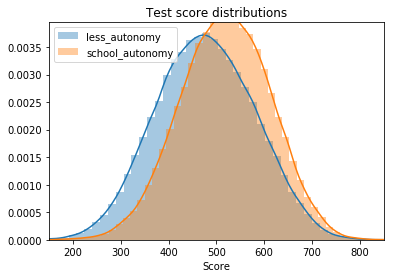

In [58]:
# Group the sample into those schools with more autonomy (may hire) and those with less.
may_hire = df['icauthire'] >= 0.5 

df['more_autonomy'] = np.nan
df.loc[~may_hire, 'more_autonomy'] = 0
df.loc[may_hire, 'more_autonomy'] = 1

# create table and plot for the distribution to compare the two groups
%matplotlib inline
ax = sns.distplot(df['pv1math'][~may_hire], label='less_autonomy')
ax = sns.distplot(df['pv1math'][may_hire], label='school_autonomy')
ax.set_xlim(150, 850)
ax.set_title('Test score distributions')
ax.set_xlabel('Score')
ax.legend();

df.groupby('more_autonomy')['pv1math'].describe()


There clearly is a difference in test scores between schools of the two groups. D, here, is the treatment: a school may choose by itself whom to hire or not. As this is a continuous variables, I chose to put the cutoff at 0.5. Playing around with different cutoffs and different proxies of autonomy (one can also use e.g. the degree to which schools may choose their teachers' starting salary) does not significantly change the way the plot looks. **I need to add a more thourough description of 'icauthire'.**

## Replication

This is the reproduction of the three tables Woessmann shows in his paper. Table 2 is a country average of contribution of each of the three above described input factors. Table 3 contrasts the variance (r-squared) due to each of the input factors alone to its variance when the others are added to the model. Table 4 takes the country mean differences and sheds some light on how much is accounted for by the model and each of the three input factors.

### Table 2

In [59]:
# Do a Weighted Least Squares Estimation
y=df['pv1math']
X=df[['escs', 'age', 'female', 'dstupreprim2', 'ageprim', 'repisced1', 'repisced2', 'dgrade7', 'dgrade8', 'dgrade9', 'dgrade11', 'dgrade12', 'dliveone', 'dlivepatch', 'dliveboth', 'dworkstat4', 'dworkstat3', 'dworkstat2', 'dworkstat1', 'dhsecateg3', 'dhsecateg2', 'dhsecateg1', 'dbook2', 'dbook3', 'dbook4', 'dbook5', 'dbook6', 'dimmig2', 'dimmig3', 'dstulanguage3', 'dstulanguage4', 'dschoolloc23', 'dschoolloc4', 'dschoolloc5', 'expps', 'davailinstmat4', 'davailinstmat1', 'insttimemath', 'propcert', 'propqped', 'cprivate', 'cschoolbudgetgov', 'mcentexa', 'purstudret', 'teacassprin', 'teacassextinsp', 'purcompave', 'purstudgrp', 'autstartsal', 'icautstartsal', 'autformbudget', 'icautformbudget', 'autcontent', 'icautcontent', 'authire', 'icauthire']]
X = sm.add_constant(X)

mod_wls = sm.WLS(y, X.astype(float), weights=df['newwgt'])
res_wls = mod_wls.fit()
print(res_wls.summary())


C:\Users\Eva\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

C:\Users\Eva\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Eva\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Eva\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

C:\Users\Eva\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

C:\Users\Eva\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning:

invalid value encounter

                            WLS Regression Results                            
Dep. Variable:                pv1math   R-squared:                     -24.782
Model:                            WLS   Adj. R-squared:                -24.788
Method:                 Least Squares   F-statistic:                    -3840.
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               1.00
Time:                        13:52:15   Log-Likelihood:            -1.7507e+06
No. Observations:              219794   AIC:                         3.502e+06
Df Residuals:                  219738   BIC:                         3.502e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                     0          0  

In [50]:
# In-sample Prediction
ypred = res_wls.predict(X)
lc = ypred

# Do a linear prediction for each of the three higher level input factors 
fam = 0
ins = 0
weights = df['newwgt']

for i in range(6):
    res = 0
    res += df['newwgt']*(res_wls.params[i]*c_res.astype(float).iloc[:,i])
for i in range(6,40):
    for j in range(34): 
        fam += df['newwgt']*(res_wls.params[i]*c_fam.astype(float).iloc[:,j])
for i in range(40, 56):
    for j in range(16):
        ins += df['newwgt']*(res_wls.params[i]*c_ins.astype(float).iloc[:,j])

# Build a new DataFrame 
new_df = pd.concat([df['cnt'], df['pv1math'], ypred, fam, res, ins, lc], axis =1)
new_df.columns = ['Country', 'Math Test Score', 'Residual', 'Family Background', 'Resources', 'Institutions', 'LC']
# Problem: column labels are wrong.

# Collapse to country level
new_df.groupby(['Country']).mean()

,Family Background,Resources,Institutions
Country,,,
AUS,333.859609,0.502900,117.340817
AUT,953.653839,1.016234,135.168377
BEL,498.164839,0.347265,105.099624
CAN,151.513755,0.237231,47.680637
CHE,532.669536,0.508211,96.212291
CZE,698.293092,0.985529,304.042482
DEU,965.014704,1.145571,162.670273
DNK,1059.903168,1.631474,336.966893
ESP,398.246435,0.148278,70.004909


Description of Table 2.

### Table 3


The above numbers do not correspond exactly to the STATA output and what Woessmann report in their paper, as I am not able to replicate the correct weighting that is done in STATA using "svy: regress". Thus, for the reproduction of the following two tables, I use the STATA output that corresponds to what the author reports.


Table 3 answers the question to what extend each of the input factors: family background, school resources, and institutions account for differences in student achievement across countries. 
The student-level estimation calculated befor is used to continue the analysis.

First, all the different variables for family background, school resources, and institutional system need to be collapsed into the three aggregated country level input factors. 

In order to do this, the authors used the student-level estimation on indiidual variables to combine those into one factor, e.g.

$family = \sum x_{i} * student \beta_{i}$

where x are the individual family background variables and the student $\beta$s are the respective coefficient estimates.
The three input factors are then collapsed to the level of the 29 OECD country observations to get three aggregate country level variables.



In [36]:
# Read in the dta file
data = pd.io.stata.read_stata('data/regression_output.dta')
data.to_csv('data/regression_output.csv')

# Create pandas Dataframe
df2 = pd.DataFrame(data=data)

# Regress the input factors alone and in all possible combinations
reg1 = smf.ols(formula = 'pv1math ~ fam + res + ins', data=df2).fit()
reg2 = smf.ols(formula = 'pv1math ~ fam', data=df2).fit()
reg3 = smf.ols(formula = 'pv1math ~ res', data=df2).fit()
reg4 = smf.ols(formula = 'pv1math ~ ins', data=df2).fit()
reg5 = smf.ols(formula = 'pv1math ~ res + ins', data=df2).fit()
reg6 = smf.ols(formula = 'pv1math ~ fam + ins', data=df2).fit()
reg7 = smf.ols(formula = 'pv1math ~ fam + res', data=df2).fit()

# Create list of R-squared
list_of_rsqrt = [reg2.rsquared, reg3.rsquared, reg4.rsquared, reg1.rsquared, reg5.rsquared, reg6.rsquared, reg7.rsquared]


# Make a table equivalent to Table 3
d = {'': ['Accounted variance single factor', 'Change in accounted variance when added'], 'Family Background': [reg2.rsquared, (reg1.rsquared-reg5.rsquared)], 'School Resources': [reg3.rsquared, (reg1.rsquared-reg6.rsquared)], 'Institutions': [reg4.rsquared, (reg1.rsquared-reg7.rsquared)], 'All Three':[reg1.rsquared, '']}
df = pd.DataFrame(data=d)
df.set_index('')

,Family Background,School Resources,Institutions,All Three
,,,,
Accounted variance single factor,0.503979,0.180757,0.533338,0.834188
Change in accounted variance when added,0.207591,0.045016,0.258944,


The table above breaks the explained variable on the country-level down into components by each of the three higher-level input factors. Each factor's contribution naturally depends on the other factors added to the regression. 

While the contribution of School Resources is quite small (4 to 18%), the other two factors, Family Background factors and Institutions seem to play a quite important role in the total cros-country variance in student test scores with 21 to 50% and 26 to 53%, respectively. 

### Table 4

Table for shows how much the simple model accounts for country achievement in test scores: For each country, its difference from the international mean and how much each of the input factors can account for this difference is computed.

In [44]:
# Compute the mean 
variables = ['pv1math', 'ins', 'res', 'fam']

for item in variables:
    var_item = []
    for i in range(df2[item].count()):
        diff_i = df2[item].loc[i] - np.mean(df2[item].astype(float))
        var_item.append(diff_i)
    if item == 'pv1math':
        list1 = var_item
    if item == 'ins':
        list2 = var_item
    if item == 'res':
        list3 = var_item
    if item == 'fam':
        list4 = var_item

# Create a new Dataframe with the means and conduct a linear regression       
df_table4 = pd.DataFrame(
    {'pv1math': list1,
     'fam': list4,
     'res' : list3,
     'ins': list2
    })

reg_dev_mean = smf.ols(formula = 'pv1math ~ fam + res + ins', data=df_table4).fit()

#predict accounted difference from International mean
xb_resid = reg_dev_mean.predict()
xb_resid = pd.DataFrame(data=xb_resid)

# unaccounted difference
unacc_diff = df_table4['pv1math'] - xb_resid

# get the values for how much each input factor accounts for the 
#accounted difference per country
xb_fam = df_table4['fam'] *reg_dev_mean.params[1]
xb_fam_df = pd.DataFrame(data=xb_fam)
xb_res = df_table4['res'] *reg_dev_mean.params[2]
xb_res_df = pd.DataFrame(data=xb_res)
xb_ins = df_table4['ins'] *reg_dev_mean.params[3]
xb_ins_df = pd.DataFrame(data=xb_ins)

# Create new dataset in preparation
h = -(df_table4['pv1math'])
h_df = pd.DataFrame(data=h)

df5 = pd.concat([df2['cnt'], df_table4['pv1math'], xb_resid, unacc_diff[0], xb_fam_df, xb_res_df, xb_ins_df, h_df], axis =1)
df5.columns = ['Country', 'pv1math', 'xb', 'unacc_diff', 'fam', 'res', 'ins', 'h']
sorted_df5= df5.sort_values(by=['h'])
table4 = sorted_df5.drop(['h'], axis=1)
table4.columns =['Country', 'Observed Difference','Unaccounted difference', 'Accounted difference', 'Accounted for by Family background', 'Accounted for by School resources', 'Accounted for by Institutions']

table4 = table4.round(2)
table4.set_index('Country')



,Observed Difference,Unaccounted difference,Accounted difference,Accounted for by Family background,Accounted for by School resources,Accounted for by Institutions
Country,,,,,,
FIN,44.55,12.85,11.61,2.66,-1.27,11.46
KOR,42.00,27.72,-3.26,13.01,5.64,9.06
NLD,38.44,46.44,-21.98,-3.45,-0.26,50.14
JPN,34.02,29.62,-5.16,17.46,2.94,9.21
CAN,33.01,15.58,8.87,15.85,3.22,-3.49
BEL,29.46,41.27,-16.82,-1.17,1.44,41.01
CHE,26.47,-0.81,25.27,-13.16,9.45,2.90
AUS,24.46,22.38,2.07,14.01,6.64,1.74
NZL,24.46,6.70,17.76,16.15,-3.00,-6.45


For most countries the model performs quite well and the unaccounted-for residual achievement is smaller than 10% of a standard deviation. However, e.g. for Newzealand, Sweden only 6%, 4%, respectively, are accounted for by the model. Differences in school resources and institutions are negative for both countries.

For Korea, 27% of the relative high international achievement is accounted for by the model. Family background factors account for most, with 13%, while institutional factors range second with almost 10% and school resources third with 6%.
In the case of Netherlands, the model over-predicts its achievement, all due to is extremely high difference in institutions. Looking into the country, one can see it has the "largest share of privately operated schools, external exams, widespread course-content autonomy, and use of assessments for retention."[FOOTNOTE!!]


### Critical Assessment: PISA

In [9]:
# Create plot for age distribution.
nonzero_entries = df['age'].where(df['age'] > 0).dropna()
ax = sns.distplot(nonzero_entries)
ax.set_xlim(15.2, 16.4)
plt.show()

In some countries, 15-year olds are tested, 15-year-olds in ninth grade, or ninth graders. Then, some countries (e.g. USA) have more inclusive school systems (High School for everybody), others (e.g. Germany) divide their students into different schools. PISA in Germany does not test the so-called "Förderschulen" -> this might cause bias due to selection, because students are NOT randomly chosen. [**FOOTNOTE/PROOF**]
Further thoughts to PISA:
- curricular validity: test and curriculum do not necessary correspond
- multiple choice: guessing as well as practicing how to do this sort of exercise might bias results.
- Problem of translation: exercises are mainly anglosaxon, different readability/length of explanatory texts
- Korea & Taiwan: singing national anthem before test -> motivational differences 